In [1]:
# Install the KAN library if you haven't already:
# !pip install git+https://github.com/KindXiaoming/pykan.git

from kan import KAN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

import kan
from kan.utils import create_dataset , create_dataset_from_data



# Generate Data

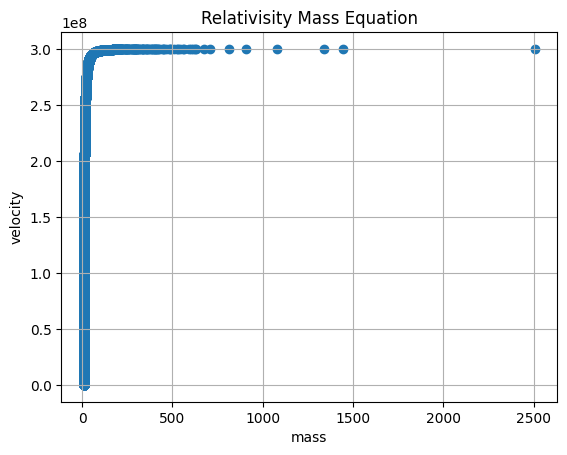

Mass: 10.8 , u: 112362035.65 
Mass: 32.3 , u: 285214291.92 
Mass: 14.7 , u: 219598182.54 
Mass: 12.5 , u: 179597545.26 
Mass: 10.1 , u: 46805592.13 
Mass: 10.1 , u: 46798356.10 
Mass: 10.0 , u: 17425083.65 
Mass: 20.0 , u: 259852843.73 
Mass: 12.5 , u: 180334503.52 
Mass: 14.2 , u: 212421773.34 


In [6]:
# for constant m 




# Generate random values for initial velocity (u) and acceleration (a) for each time step
np.random.seed(42)  # For reproducibility
N = 100000

c = 3 * 10**8
v = np.random.uniform(0, c, N)
m0 = 10

# Generate time values from 0 to 10 seconds with 0.1 second intervals


# Calculate displacement using the equation s = ut + 1/2 at^2
m = m0 / np.sqrt(1 - v**2 / c**2 )

# Plotting the data
plt.scatter(m, v)
plt.xlabel("mass")
plt.ylabel("velocity")
plt.title("Relativisity Mass Equation")
plt.grid(True)
plt.show()

# Displaying the generated data for the first 10 points
for i in range(10):
    print(f"Mass: {m[i]:.1f} , u: {v[i]:.2f} ")

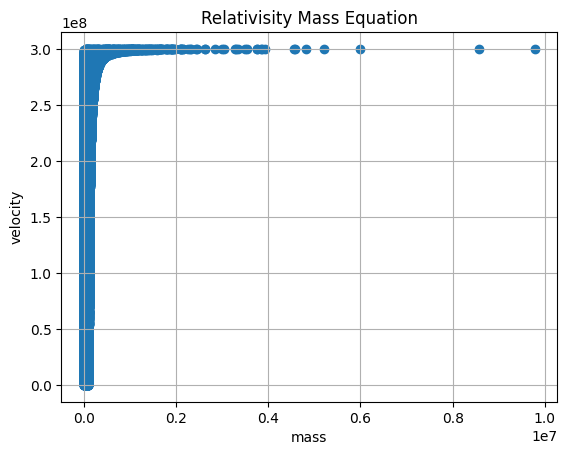

Mass: 62637.7 , u: 112362035.65 
Mass: 169955.0 , u: 285214291.92 
Mass: 51524.7 , u: 219598182.54 
Mass: 61574.9 , u: 179597545.26 
Mass: 36962.9 , u: 46805592.13 
Mass: 66608.9 , u: 46798356.10 
Mass: 83644.3 , u: 17425083.65 
Mass: 157461.6 , u: 259852843.73 
Mass: 42632.0 , u: 180334503.52 
Mass: 72142.2 , u: 212421773.34 


In [16]:



# Generate random values for initial velocity (u) and acceleration (a) for each time step
np.random.seed(42)  # For reproducibility
N = 100000

# constant
c = 3 * 10**8

# variables
v = np.random.uniform(0, c, N)
m0 = np.random.uniform(1, 100000, N)

# Generate time values from 0 to 10 seconds with 0.1 second intervals


# Calculate displacement using the equation s = ut + 1/2 at^2
m = m0 / np.sqrt(1 - v**2 / c**2 )

# Plotting the data
plt.scatter(m, v)
plt.xlabel("mass")
plt.ylabel("velocity")
plt.title("Relativisity Mass Equation")
plt.grid(True)
plt.show()

# Displaying the generated data for the first 10 points
for i in range(10):
    print(f"Mass: {m[i]:.1f} , u: {v[i]:.2f} ")

In [17]:
m.shape

(100000,)

In [18]:
# Create a DataFrame with the variables
df = pd.DataFrame({
    'm': m,
    'm0': m0,
    'v': v,

})

# Save the DataFrame to a CSV file
df.to_csv('../data/relativistic_mass_eq_data_3.csv', index=False)

In [12]:
X = df[['m0','v']].values
y = df['m'].values

# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert feature matrix to tensor
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Convert target to tensor and reshape


In [11]:
X_tensor

tensor([[5.8078e+04, 1.1236e+08],
        [5.2697e+04, 2.8521e+08],
        [3.5104e+04, 2.1960e+08],
        ...,
        [1.9220e+04, 2.0234e+08],
        [6.5308e+04, 1.4983e+08],
        [1.5601e+02, 1.1697e+08]])

In [19]:


# Assuming the data is already generated and loaded into X and y as tensors
# X: input tensor (features), y: output tensor (target)
# X_tensor is of shape [n_samples, 3] (u, a, t) and y_tensor is of shape [n_samples, 1] (s)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Input layer (3 input features)
        self.fc1 = nn.Linear(2, 64)

        # 2 layers with 64 neurons
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        # Output layer (1 output)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        # Forward pass through the network
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Assuming the following variables are already defined:
# X_tensor (input data of shape [n_samples, 3]), y_tensor (output data of shape [n_samples, 1])

# Initialize the model
model = MLP()

# Define the loss function (Mean Squared Error) and optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




In [20]:
from torchsummary import summary

summary(model , (1,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]             192
            Linear-2                [-1, 1, 64]           4,160
            Linear-3                [-1, 1, 32]           2,080
            Linear-4                 [-1, 1, 1]              33
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [21]:

# Training the model
epochs = 100
batch_size = 10
train_losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 1229501497344.0000
Epoch [20/100], Loss: 313452199936.0000
Epoch [30/100], Loss: 21239257088.0000
Epoch [40/100], Loss: 11451219968.0000
Epoch [50/100], Loss: 11597850624.0000
Epoch [60/100], Loss: 11431580672.0000
Epoch [70/100], Loss: 11419264000.0000
Epoch [80/100], Loss: 11418182656.0000
Epoch [90/100], Loss: 11274631168.0000
Epoch [100/100], Loss: 11261845504.0000


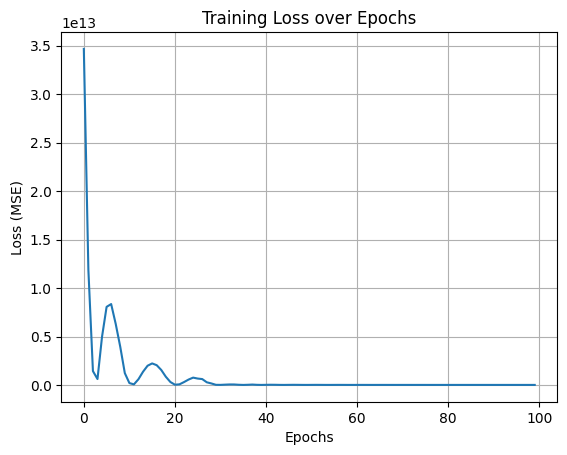

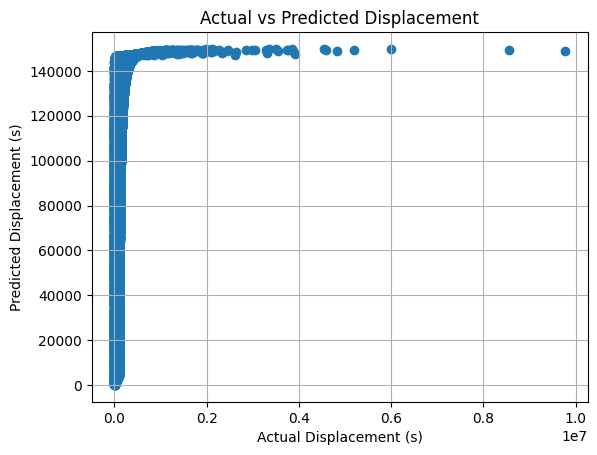

Final Loss (MSE): 11244871680.0000


In [22]:
# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "mlp_model.pth")

# Display the final evaluation loss
final_loss = criterion(y_pred, y_tensor)
print(f"Final Loss (MSE): {final_loss.item():.4f}")


In [23]:
import torch
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Assuming `y_tensor` (actual values) and `y_pred` (predicted values) are available
# Convert tensors to numpy arrays for easier metric calculation
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 46347.3594
Mean Squared Error (MSE): 11244870656.0000
Root Mean Squared Error (RMSE): 106041.8345
R-Squared (R²): 0.1076


# KAN

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device =  torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(device)


cpu


In [7]:

df = pd.read_csv("../data/relativistic_mass_eq_data_3.csv")



data = torch.tensor(df.to_numpy() , dtype=torch.float32)



x = data[:,[1,2]]
y = data[:,[0]]

dataset = create_dataset_from_data(x, y, device=device)


In [8]:
dataset

{'train_input': tensor([[2.6473e+04, 1.0157e+08],
         [4.8166e+04, 7.7553e+07],
         [3.2913e+04, 2.4014e+08],
         ...,
         [1.6003e+04, 2.2561e+08],
         [2.9202e+04, 1.1598e+08],
         [1.5347e+04, 5.2602e+07]]),
 'test_input': tensor([[2.4540e+04, 2.4973e+08],
         [5.4530e+04, 9.1273e+07],
         [5.3519e+04, 1.2958e+08],
         ...,
         [9.0035e+04, 2.3518e+08],
         [2.5360e+04, 2.7958e+08],
         [1.5601e+02, 1.1697e+08]]),
 'train_label': tensor([[28134.8652],
         [49861.1406],
         [54913.1875],
         ...,
         [24279.7832],
         [31664.2227],
         [15588.3428]]),
 'test_label': tensor([[ 44286.3828],
         [ 57243.4062],
         [ 59340.6914],
         ...,
         [145020.0156],
         [ 69930.3906],
         [   169.4168]])}

In [9]:


model = KAN(width=[2,[5,5],[5,5],1], device=device)


model.fit(dataset, steps=20, lamb=0.001) ;

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 20/20 [13:32<00:00, 40.62s/it]

saving model version 0.1


In [13]:
# Training the model
epochs = 100
batch_size = 10
train_losses = []


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: nan
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


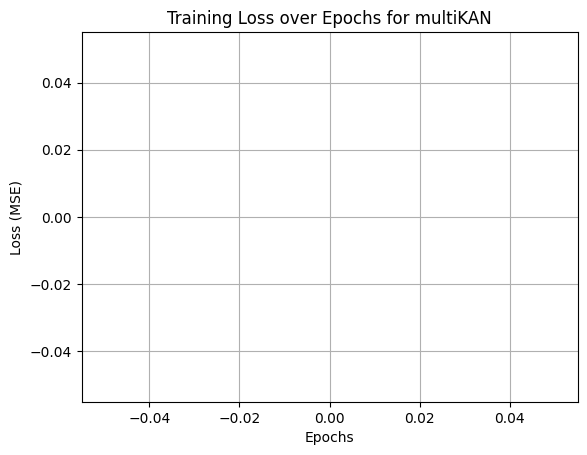

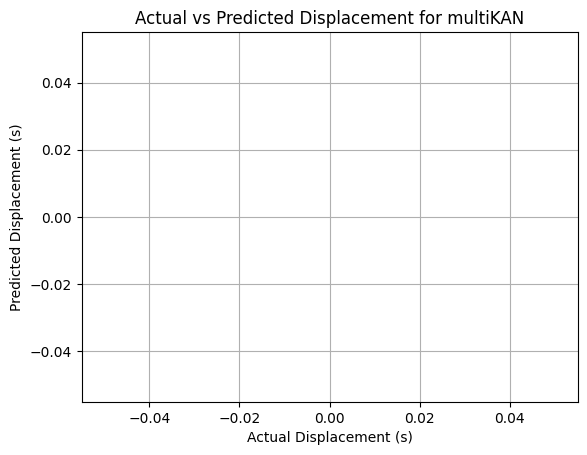

In [14]:
# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs for multiKAN")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement for multiKAN")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "multiKAN_model.pth")



In [15]:
# Calculate performance metrics
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


ValueError: Input contains NaN.

In [ ]:
model.plot()